# Numerical Quadrature with the trapezoid rule

This notebook was originally developed by Jonathan Gillett as part of the solutions for the MCSC 6030 assignments. The original version can be found in [this repository](https://deepnote.com/workspace/my-workspace-9288-1085f742-c79b-44d4-9865-3ed309cc5ebe/project/8f073f19-0f81-4341-96dd-751ca4d6a3d0/notebook/570e34cf75824a9b89a2d30082ff3848).

This version was retrieved on 14 October 2024 and slightly modified to run under Python 3.x.


Numerical quadrature refers to approximating a definite integral numerically, 
$$~~ \int_a^b f(x) dx.$$
Many numerical analysis textbooks describe a variety of quadrature methods or "rules".  

First define a simple function for which we know the exact antiderivative:

In [1]:
import numpy as np
import matplotlib.pyplot as mpl

def f1(x):
    return 1. + x**3

a1 = 0.
b1 = 2.
int_true1 = (b1-a1) + (b1**4 -a1**4) / 4.
print ("true integral: %22.14e" % int_true1)

true integral:   6.00000000000000e+00


## The Trapezoid Rule

We will first look at the Trapezoid method.  This method is implemented by evaluating the function at $n$ points and then computing the areas of the trapezoids defined by a piecewise linear approximation to the original function defined by these points.  In the figure below, we are approximating the integral of the blue curve by the sum of the areas of the red trapezoids.

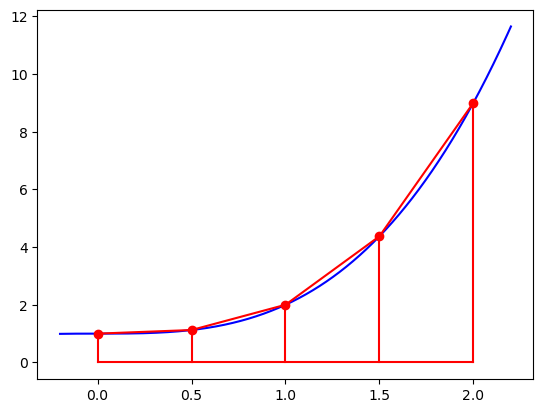

In [2]:
def plot_trap(f,a,b,n):
    x = np.linspace(a-0.2, b+0.2, 10000) # grid points for smooth plot
    mpl.plot(x,f(x),'b-')
    xj = np.linspace(a,b,n)
    mpl.plot(xj,f(xj),'ro-')
    for xi in xj:
        mpl.plot([xi,xi], [0,f(xi)], 'r')
    mpl.plot([a,b], [0,0], 'r') # plot line along x-axis
    mpl.show()

plot_trap(f1,a1,b1,5)

### The Trapezoid rule formula

The area of a single trapezoid is the width of the base times the average height, so between points $x_j$ and $x_{j+1}$ this gives:
$$ \frac{h}{2} (f(x_j) + f(x_{j+1}). $$

Summing this up over all the trapezoids gives:
$$ h\left(\frac 1 2 f(x_0) + f(x_1) + f(x_2) + \cdots + f(x_{n-2}) + \frac 1 2 f(x_{n-1})\right) = h\sum_{j=0}^{n-1} f(x_j) - \frac h 2 \left(f(x_0) + f(x_{n-1})\right) =  h\sum_{j=0}^{n-1} f(x_j) - \frac h 2 \left(f(a) + f(b))\right). $$

This can be implemented as follows (note that in Python fj[-1] refers to the last element of fj, and similarly fj[-2] would be the next to last element).

In [3]:
def trapezoid(f,a,b,n):
    h = (b-a)/(n-1)
    xj = np.linspace(a,b,n)
    fj = f(xj)
    int_trapezoid = h*np.sum(fj) - 0.5*h*(fj[0] + fj[-1])
    return int_trapezoid


We can test it out for the points used in the figure above:

In [4]:
n = 5
int_trap = trapezoid(f1,a1,b1,n)
error = abs(int_trap - int_true1)
print("trapezoid rule approximation: %22.14e,  error: %10.3e" % (int_trap, error))

trapezoid rule approximation:   6.25000000000000e+00,  error:  2.500e-01


Using more points will give a better approximation, try changing it in the cell above.

### Convergence tests

If we increase $n$, the number of points used, and hence decrease $h$, the spacing between points, we expect the error to converge to zero for reasonable functions $f(x)$.

The trapezoid rule is "second order accurate", meaning that the error goes to zero like $O(h^2)$ for a function that is sufficiently smooth (for example if its second derivative is continuous).  For small $h$, the error is expected to be behave like $Ch^2 + O(h^3)~$ as $h$ goes to zero, where $C$ is some constant that depends on how smooth $h$ is.  

If we double $n$ (and halve $h$) then we expect the error to go down by a factor of 4 roughly (from $Ch^2$ to $C(h/2)^2~$).

We can check this by trying several values of n and making a table of the errors and the ratio from one n to the next:

In [5]:
def error_table(f,a,b,nvals,int_true):
    print ("      n         trapezoid            error       ratio")
    last_error = 0.  # need something for first ratio
    for n in nvals:
        int_trap = trapezoid(f,a,b,n)
        error = abs(int_trap - int_true)
        errors.append(error)
        ratio = last_error / error
        ratios.append(ratio)
        last_error = error # for next n
        print ("%8i  %22.14e  %10.3e  %10.3e" % (n,int_trap, error, ratio))

nvals = np.array([5, 10, 20, 40, 80, 160, 320])
errors = []
ratios = []
error_table(f1,a1,b1,nvals,int_true1)

      n         trapezoid            error       ratio
       5    6.25000000000000e+00   2.500e-01   0.000e+00
      10    6.04938271604938e+00   4.938e-02   5.062e+00
      20    6.01108033240997e+00   1.108e-02   4.457e+00
      40    6.00262984878369e+00   2.630e-03   4.213e+00
      80    6.00064092292902e+00   6.409e-04   4.103e+00
     160    6.00015822158934e+00   1.582e-04   4.051e+00
     320    6.00003930778982e+00   3.931e-05   4.025e+00


(Note that the first ratio reported is meaningless.)

Convergence might be easier to see in a plot.  If a method is p'th order accurate then we expect the error to behave like $E\approx Ch^p$ for some constant $C$, for small $h$.  This is hard to visualize.  It is much easier to see what order accuracy we are achieving if we produce a log-log plot instead, since $E = Ch^p~$ means that $\log E = \log C + p\log h$ 

In other words $\log E~$ is a linear function of $\log h~$.

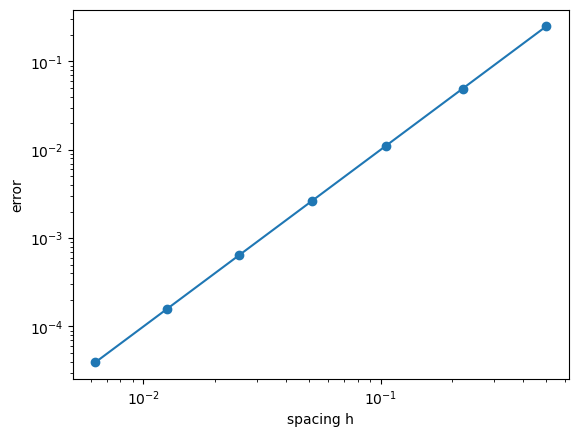

In [6]:
def error_plot(f,a,b,nvals,int_true):
    errvals = np.zeros(nvals.shape)  # initialize to right shape
    for i in range(len(nvals)):
        n = nvals[i]
        int_trap = trapezoid(f,a,b,n)
        error = abs(int_trap - int_true)
        errvals[i] = error
    hvals = (b - a) / (nvals - 1)  # vector of h values for each n
    mpl.loglog(hvals,errvals, 'o-')
    mpl.xlabel('spacing h')
    mpl.ylabel('error')
    mpl.show()

error_plot(f1,a1,b1,nvals,int_true1)

### An oscillatory function

If the function $f(x)$ is not as smooth (has larger second derivative at various places) then the accuracy with a small number of points will not be nearly as good.  For example, consider this function:

In [7]:
k = 50.
def f2(x):
    return 1. + x**3 + np.sin(k*x)

a2 = 0.
b2 = 2.
int_true2 = (b2-a2) + (b2**4 - a2**4) / 4. - (1./k) * (np.cos(k*b2) - np.cos(k*a2))
print ("true integral: %22.14e" % int_true2)

true integral:   6.00275362255425e+00


Making k larger will make it more oscillatory.  For this function with k=50, using n=10 points is not going to give a very good approximation:

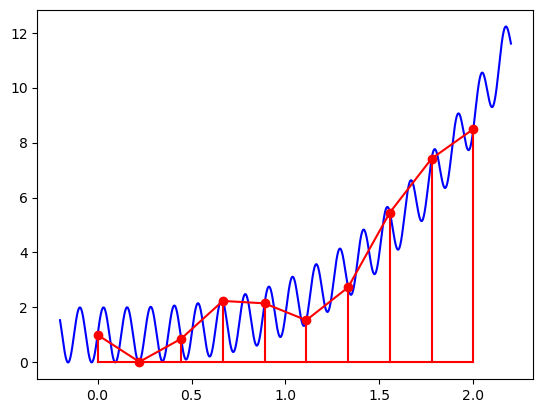

In [8]:
plot_trap(f2,a2,b2,10)

This doesn't look very good, but for larger values of $n$, we still see the expected convergence rate:

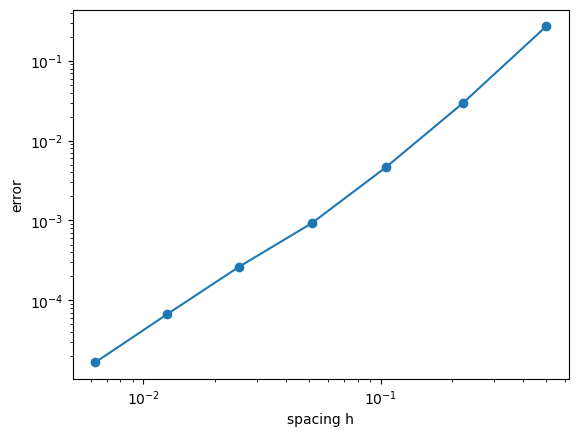

In [9]:
error_plot(f2,a2,b2,nvals,int_true2)

Now make the function much more oscillatory with a larger value of $k$...

In [10]:
k = 1000.
def f2(x):
    return 1. + x**3 + np.sin(k*x)

a2 = 0.
b2 = 2.
int_true2 = (b2-a2) + (b2**4 - a2**4) / 4. - (1./k) * (np.cos(k*b2) - np.cos(k*a2))
print ("true integral: %22.14e" % int_true2)

true integral:   6.00136745954910e+00


For the previous choice of nvals the method does not seem to be doing well:

nvals =  [  5  10  20  40  80 160 320]


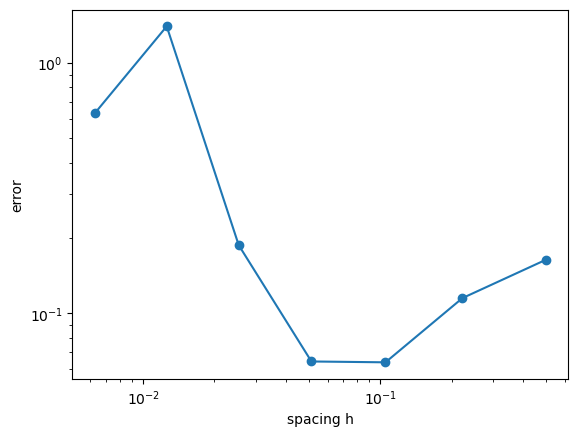

In [11]:
nvals = np.array([5, 10, 20, 40, 80, 160, 320])
print ("nvals = ",nvals)
error_plot(f2,a2,b2,nvals,int_true2)

In this case the $O(h^2)~$ behavior does not become apparent unless we use much smaller $h$ values (i.e., much larger values of $n$) so that we are resolving the oscillations:

nvals =  [    5    10    20    40    80   160   320   640  1280  2560  5120 10240]


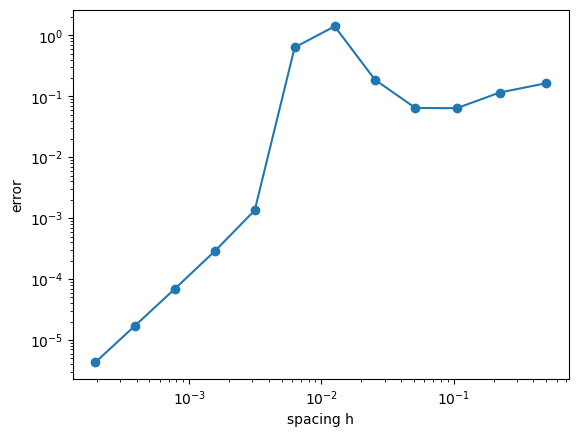

In [12]:
nvals = np.array([5 * 2**i for i in range(12)])
print ("nvals = ",nvals)
error_plot(f2,a2,b2,nvals,int_true2)

Eventually, now that we have sufficiently large values of $n$, we see second-order convergence and ratios that approach 4:

In [13]:
error_table(f2,a2,b2,nvals,int_true2)

      n         trapezoid            error       ratio
       5    6.16511276525547e+00   1.637e-01   0.000e+00
      10    6.11640342954375e+00   1.150e-01   1.423e+00
      20    5.93766915031525e+00   6.370e-02   1.806e+00
      40    6.06556743605608e+00   6.420e-02   9.922e-01
      80    6.18855102747922e+00   1.872e-01   3.430e-01
     160    7.40477216296790e+00   1.403e+00   1.334e-01
     320    5.36931843072561e+00   6.320e-01   2.220e+00
     640    6.00002231770676e+00   1.345e-03   4.699e+02
    1280    6.00107919913986e+00   2.883e-04   4.666e+00
    2560    6.00129774432061e+00   6.972e-05   4.135e+00
    5120    6.00135017283867e+00   1.729e-05   4.033e+00
   10240    6.00136314705017e+00   4.312e-06   4.009e+00


Original filename: Assignment-03-question-1-Numerical-Quadrature-with-the-Trapezoid-Rule.ipynb